# Using Scikit-tda for PH computation.

This is a test following the [tutorial](https://docs.scikit-tda.org/en/latest/notebooks/scikit-tda%20Tutorial.html) from the documentation of Scikit-tda.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
from tda_m2r import *

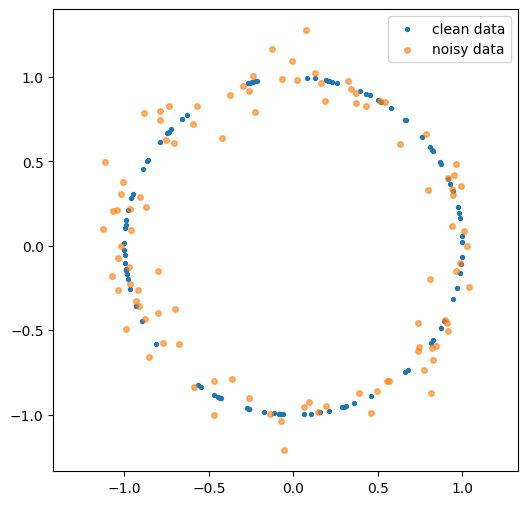

In [2]:
import tadasets
np.random.seed(565656)

data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
data_noisy = tadasets.dsphere(d=1, n=100, noise=0.10)

# data_clean = tadasets.infty_sign(n=100, noise=0.0)
# data_noisy = tadasets.infty_sign(n=100, noise=0.15)

plt.rcParams["figure.figsize"] = (6, 6)
plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data", s=8)
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data", s=16, alpha=0.6)
plt.axis('equal')
plt.legend()
plt.show()

In [3]:
import ripser
import persim

def diagram_sizes(dgms):
    return ", ".join([f"$|H_{i}|$={len(d)}" for i, d in enumerate(dgms)])

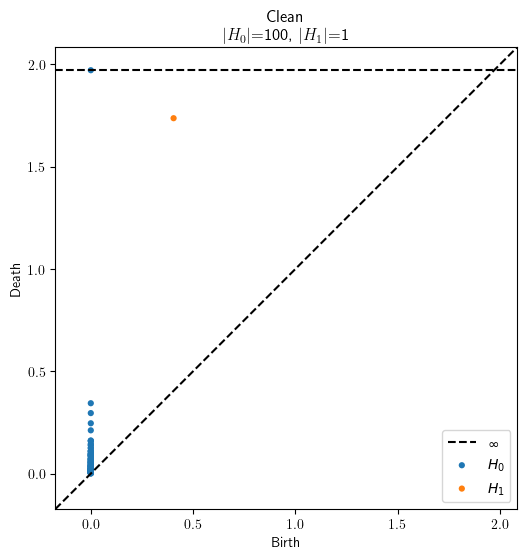

In [4]:
dgm_clean = ripser.ripser(data_clean)['dgms']
persim.plot_diagrams(
    dgm_clean,
    show=True,
    title=f"Clean\n{diagram_sizes(dgm_clean)}"
)

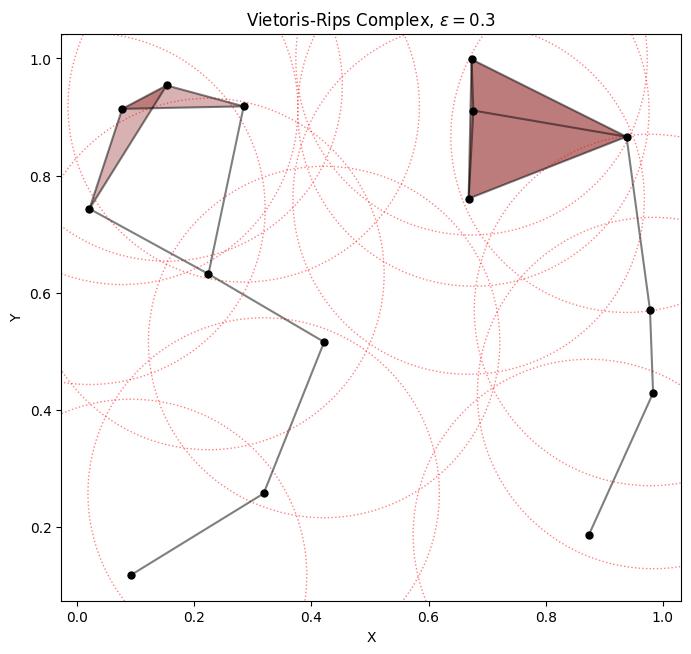

In [27]:
data_noisy = np.random.rand(15, 2)
vrips(data_noisy, r=0.3, circle=True)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


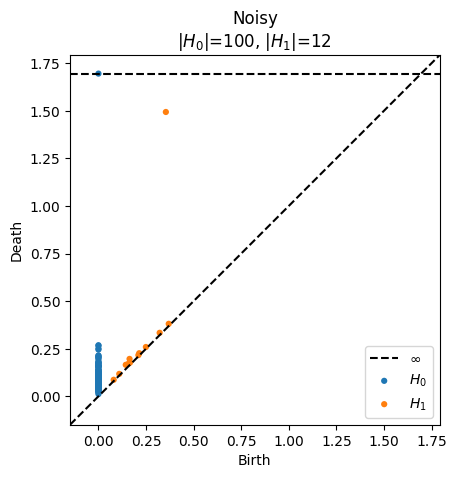

In [6]:
from ripser import Rips

rips = Rips()
dgm_noisy = rips.transform(data_noisy)
rips.plot(show=True, title=f"Noisy\n{diagram_sizes(dgm_noisy)}")

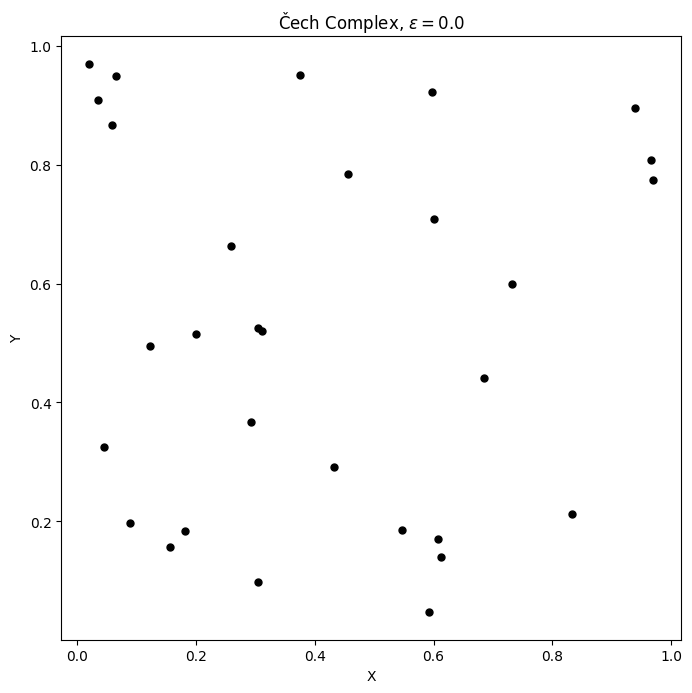

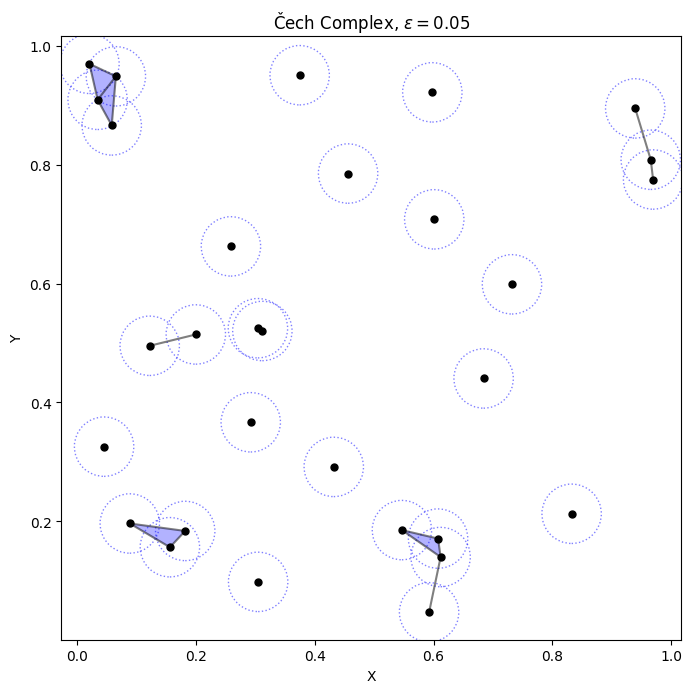

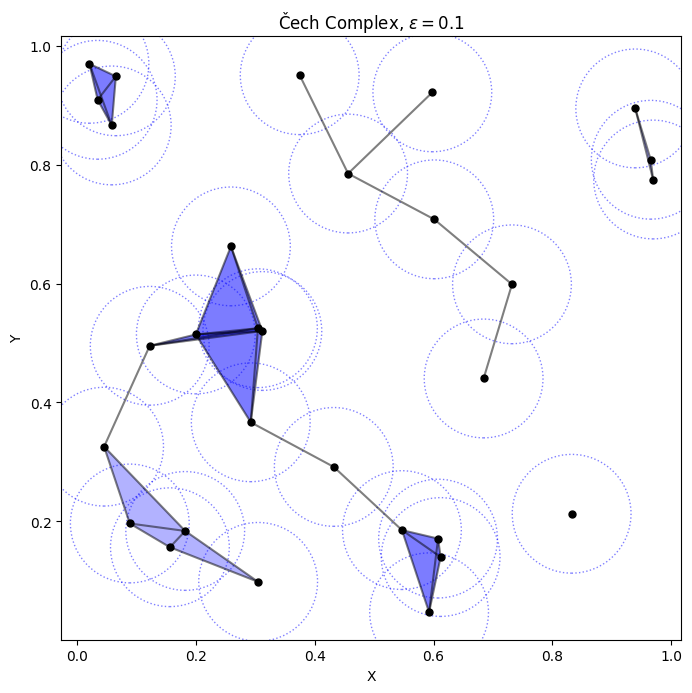

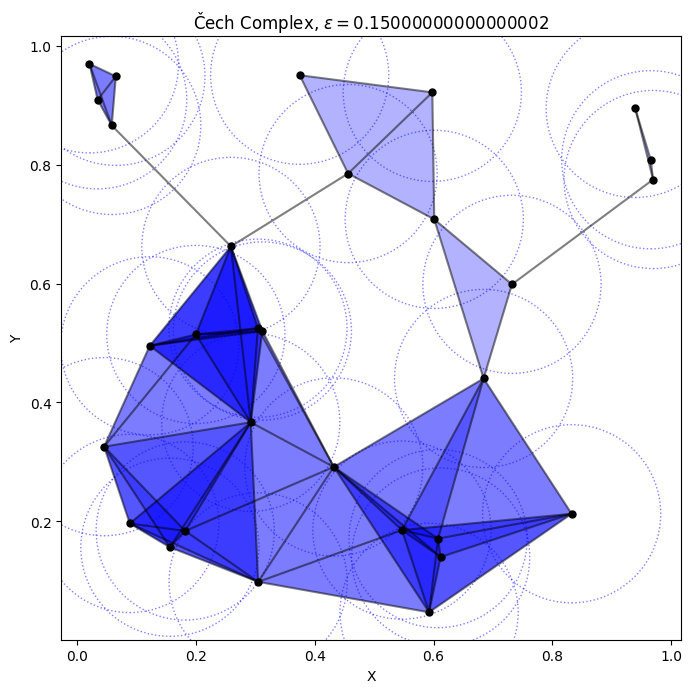

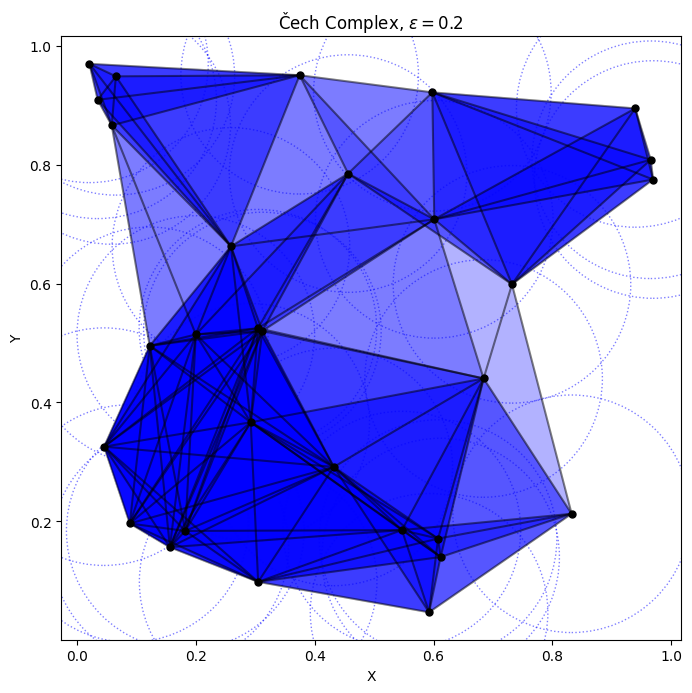

In [7]:
np.random.seed(42)  # For reproducibility
point_cloud = np.random.rand(30, 2)

for x in range(1,6):
    cech(point_cloud=point_cloud, r=0.05*(x-1))

/Users/cm/Documents/Python/2nd_Year/M2R/tda/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


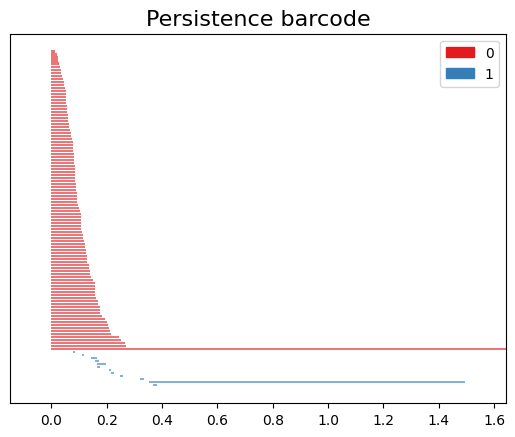

In [8]:
import gudhi as gd

gd_barcode(dgm_noisy)

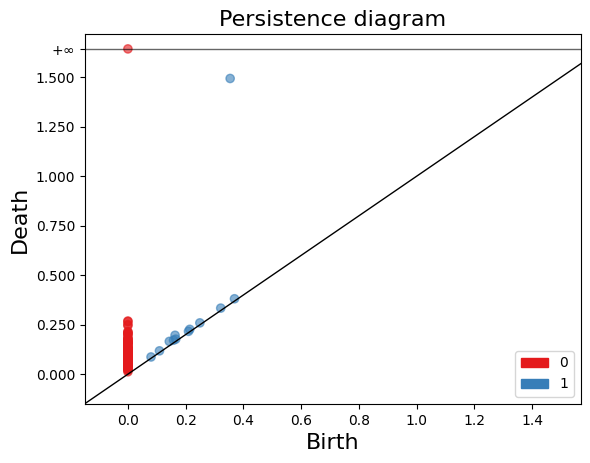

In [9]:
gd_persistence(dgm_noisy)

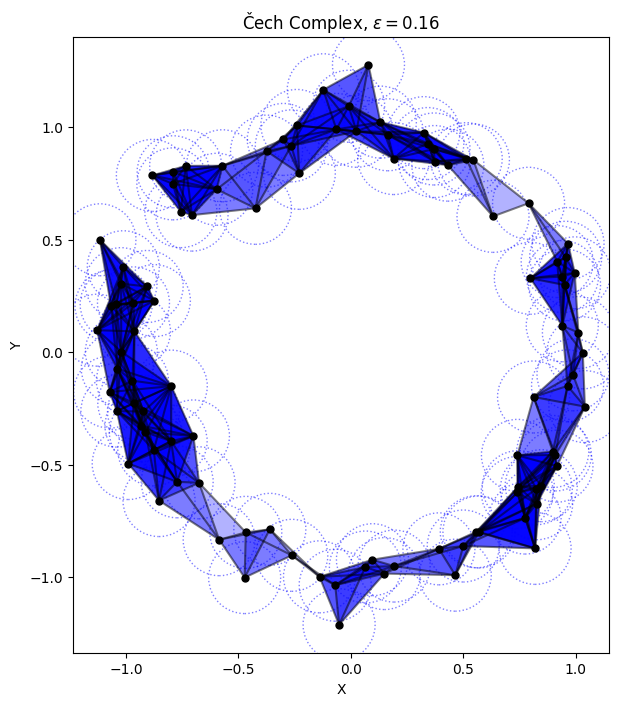

In [10]:
cech(data_noisy, r=0.16)

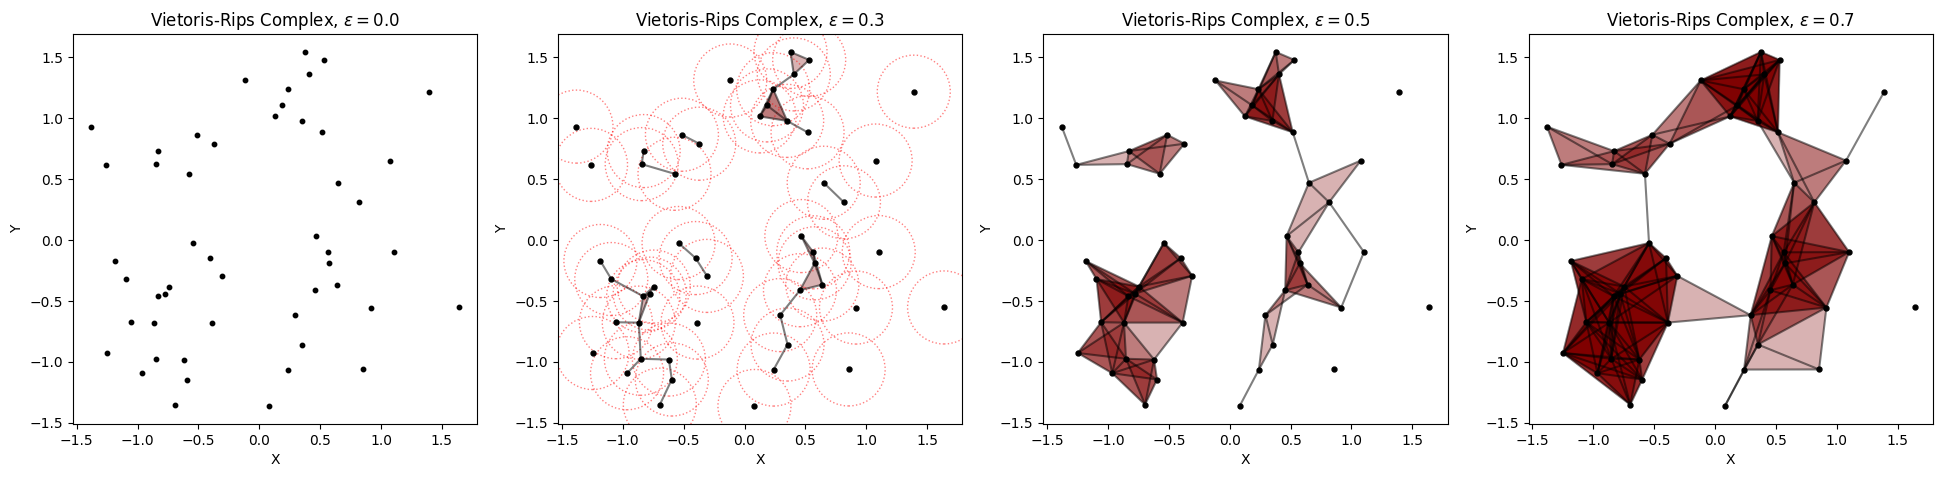

In [34]:
data_noisy = tadasets.dsphere(d=1, n=50, noise=0.4)
fig, axs = plt.subplots(1, 4, figsize=(24, 20))
vrips(data_noisy, r=0.0, ax=axs[0], p_scale=6, circle=True)
vrips(data_noisy, r=0.3, ax=axs[1], p_scale=4, circle=True)
vrips(data_noisy, r=0.5, ax=axs[2], p_scale=4)
vrips(data_noisy, r=0.7, ax=axs[3], p_scale=4)
plt.subplots_adjust(hspace=0.1)

In [12]:
from sklearn.metrics.pairwise import pairwise_distances
D = pairwise_distances(data_noisy, metric = "euclidean") 
D

array([[0.        , 0.54738604, 1.54129541, ..., 1.55075235, 0.04184727,
        1.52813596],
       [0.54738604, 0.        , 2.08401492, ..., 1.70514137, 0.58611463,
        1.32846065],
       [1.54129541, 2.08401492, 0.        , ..., 1.86985898, 1.50588655,
        2.55397572],
       ...,
       [1.55075235, 1.70514137, 1.86985898, ..., 0.        , 1.56294863,
        1.00780754],
       [0.04184727, 0.58611463, 1.50588655, ..., 1.56294863, 0.        ,
        1.56235652],
       [1.52813596, 1.32846065, 2.55397572, ..., 1.00780754, 1.56235652,
        0.        ]])

In [13]:
point_cloud = np.random.rand(30, 1)
point_cloud

array([[0.20701845],
       [0.160645  ],
       [0.60842045],
       [0.76422657],
       [0.70156615],
       [0.21942644],
       [0.23855319],
       [0.76835318],
       [0.91925526],
       [0.78707136],
       [0.4562693 ],
       [0.76272501],
       [0.84226283],
       [0.34073099],
       [0.01493687],
       [0.76657663],
       [0.83327753],
       [0.25714377],
       [0.08600721],
       [0.89699584],
       [0.13905275],
       [0.75051872],
       [0.1375145 ],
       [0.08001156],
       [0.25312777],
       [0.98092314],
       [0.73639413],
       [0.83526295],
       [0.72712668],
       [0.04511245]])

In [14]:
t = ripser.ripser(point_cloud)['dgms']
len(t[0])

30